In [3]:
import os
import glob
import pandas as pd
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations


In [4]:
pkl_dir = '/data/users2/jwardell1/undersampling-project/HCP/pkl-files/us-6'


# Read and concatenate sr1 data
joined_files = os.path.join(pkl_dir, 'sr1_*.pkl')
joined_list = glob.glob(joined_files)
sr1 = pd.concat((pd.read_pickle(file).assign(sampling_rate='sr1') for file in joined_list), ignore_index=True)

# Read and concatenate sr2 data
joined_files = os.path.join(pkl_dir, 'sr2_*.pkl')
joined_list = glob.glob(joined_files)
sr2 = pd.concat((pd.read_pickle(file).assign(sampling_rate='sr2') for file in joined_list), ignore_index=True)

# Read and concatenate concat data
joined_files = os.path.join(pkl_dir, 'concat_*.pkl')
joined_list = glob.glob(joined_files)
concat = pd.concat((pd.read_pickle(file).assign(sampling_rate='concat') for file in joined_list), ignore_index=True)

# Read and concatenate add data
joined_files = os.path.join(pkl_dir, 'add_*.pkl')
joined_list = glob.glob(joined_files)
add = pd.concat((pd.read_pickle(file).assign(sampling_rate='add') for file in joined_list), ignore_index=True)

# Concatenate all dataframes
all_data = pd.concat([sr1, sr2, concat, add], ignore_index=True)



# Function to split each row into multiple rows based on cross-validation index
def split_row(row):
    new_rows = []
    for cv_ix, auc in enumerate(row['test_scores']):
        new_row = row.copy()
        new_row['auc'] = auc
        new_row['cv_ix'] = cv_ix
        new_rows.append(new_row)
    return pd.DataFrame(new_rows)

# Apply the split_row function to each row of the dataframe and concatenate the results
result_df = pd.concat(all_data.apply(split_row, axis=1).tolist(), ignore_index=True)



# Drop the original 'test_scores' column as it's no longer needed
result_df.drop('test_scores', axis=1, inplace=True)



grouped_classifiers = result_df.groupby('classifier')


classifier_dfs = {}
for classifier, group_df in grouped_classifiers:
    classifier_dfs[classifier] = group_df.copy()

mlp_df = classifier_dfs['Multilayer Perceptron']
lr_df = classifier_dfs['Logistic Regression']
svm_df = classifier_dfs['SVM']
nb_df = classifier_dfs['Naive Bayes']


dfs = [mlp_df, lr_df, svm_df, nb_df]
classifiers = ['Multilayer Perceptron', 'Logistic Regression', 'SVM', 'Naive Bayes']
sampling_rates = ['sr1', 'sr2', 'add', 'concat']
#sampling_rates = [ 'sr2', 'add', 'concat']
hue_order = sampling_rates
palette = { item: plt.cm.tab20(i) for i, item in enumerate(sampling_rates)}

# Combine all dataframes into one dataframe for plotting
combined_df = pd.concat(dfs)
#snr_levels = [0.5 , 0.6 , 0.7 , 0.8 , 0.9 , 1.0 , 1.1 , 1.2 , 1.3 , 1.4 , 1.5 , 1.6 , 1.7 , 1.8 , 1.9 , 2.0]
snr_levels = [2.1, 2.2, 2.3, 2.4, 2.5]

lower_limit = 1.5
combined_df = combined_df[combined_df['snr'] >= lower_limit]

KeyboardInterrupt: 

In [ ]:
df = combined_df.groupby(by="sampling_rate").agg(median_total_auc=("auc", "median"))
df


median_total_auc
sampling_rate                  
add                    0.529909
concat                 0.532526
sr1                    0.532015
sr2                    0.519661

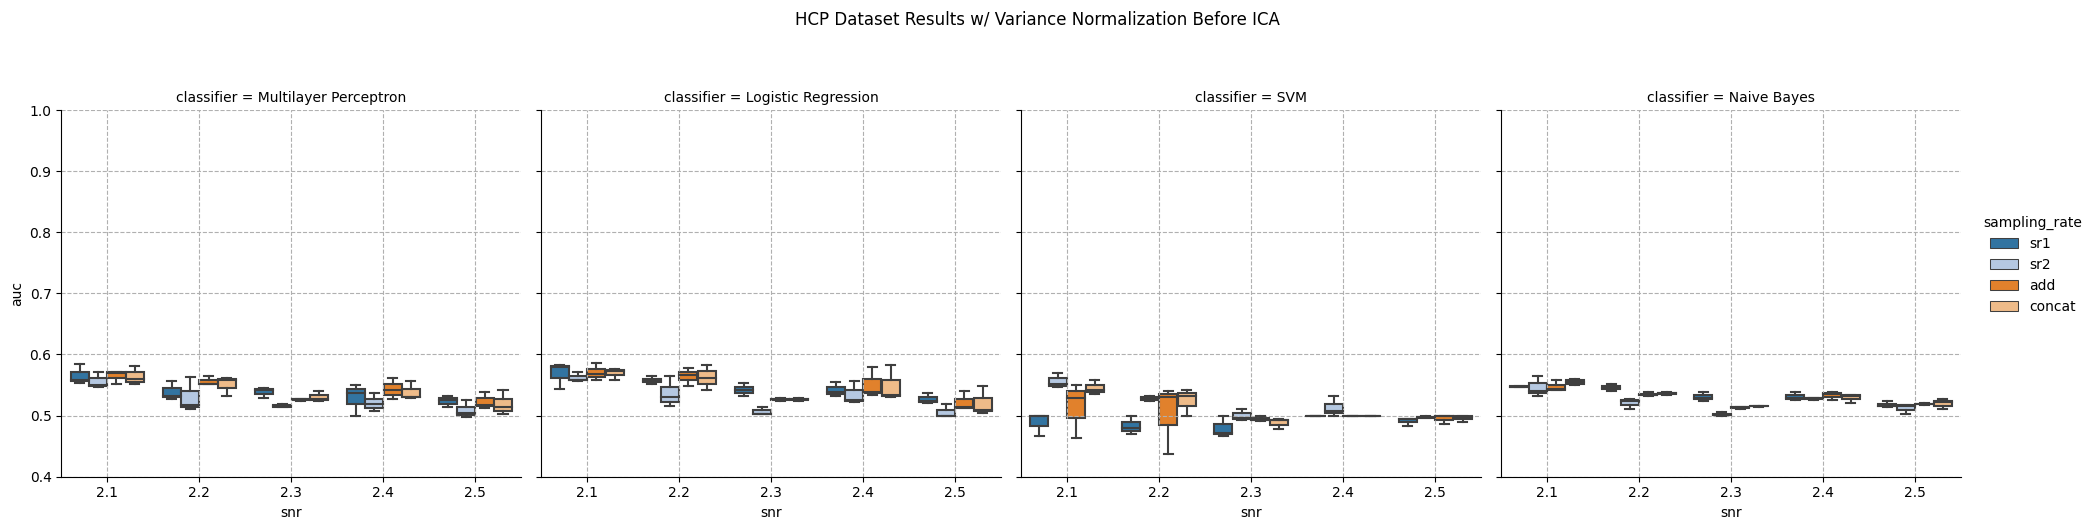

In [ ]:
%matplotlib inline


# Combine all dataframes into one dataframe for plotting
combined_df = pd.concat(dfs)
#snr_levels = [0.5 , 0.6 , 0.7 , 0.8 , 0.9 , 1.0 , 1.1 , 1.2 , 1.3 , 1.4 , 1.5 , 1.6 , 1.7 , 1.8 , 1.9 , 2.0]


yticks_start = 0.4
yticks_step = 0.1

ax = sns.catplot(
    x="snr", 
    order=snr_levels,
    y="auc",
    hue="sampling_rate",
    hue_order=hue_order,
    col="classifier",
    data=combined_df,
    kind="box",
    palette=palette,
    showfliers=False, 
)


ax.set(ylim=(yticks_start, 1), yticks=[i for i in np.arange(yticks_start, 1 + yticks_step, yticks_step)])

ax.fig.suptitle("HCP Dataset Results w/ Variance Normalization Before ICA", y=1.05)

plt.subplots_adjust(top=0.85)
for axes in ax.axes.flat:
    axes.grid(True, which='both', axis='both', linestyle='--')




p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2.5_sr2 vs. 2.5_add: Mann-Whitney-Wilcoxon test two-sided, P_val:9.980e-02 U_stat=4.300e+01
2.1_sr2 vs. 2.1_add: Mann-Whitney-Wilcoxon test two-sided, P_val:9.770e-01 U_stat=7.100e+01
2.2_sr2 vs. 2.2_add: Mann-Whitney-Wilcoxon test two-sided, P_val:1.937e-02 U_stat=3.100e+01
2.3_sr2 vs. 2.3_add: Mann-Whitney-Wilcoxon test two-sided, P_val:1.124e-01 U_stat=4.400e+01
2.4_sr2 vs. 2.4_add: Mann-Whitney-Wilcoxon test two-sided, P_val:2.472e-01 U_stat=5.150e+01
2.5_sr1 vs. 2.5_add: Mann-Whitney-Wilcoxon test two-sided, P_val:7.074e-01 U_stat=7.900e+01
2.3_sr2 vs. 2.3_concat: Mann-Whitney-Wilcoxon test two-sided, P_val:6.896e-02 U_stat=4.000e+01
2.4_sr1 vs. 2.4_add: Mann-Whitney-Wilcoxon test two-sided, P_val:5.787e-01 U_stat=6.200e+01
2.4_sr2 vs. 2.4_concat: Mann-Whitney-Wilcoxon test two-sided, P_val:4

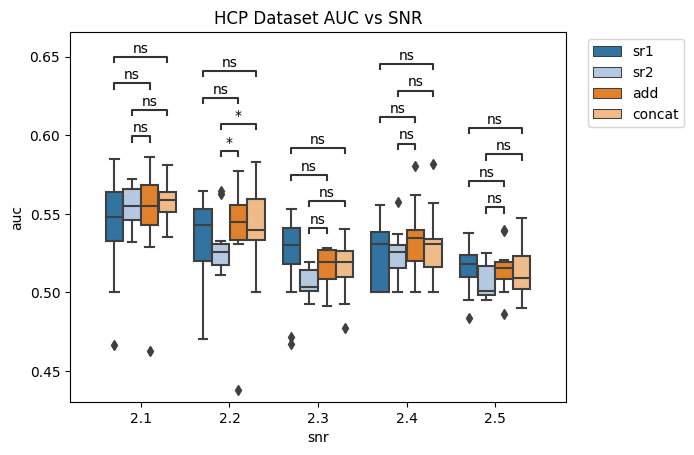

In [ ]:
x = "snr"
y = "auc"
hue = "sampling_rate"
hue_order=sampling_rates
order = snr_levels
pairs = []
excluded_pairs = [{'sr1', 'sr2'}, {'add', 'concat'}]

for snr_level in order:
    for pair in combinations(hue_order, 2):
        if not set(pair) in excluded_pairs:  # Exclude specific pairs
            pairs.append(((snr_level, pair[0]), (snr_level, pair[1])))

palette = { item: plt.cm.tab20(i) for i, item in enumerate(sampling_rates)}

# Plot the boxplot
ax = sns.boxplot(data=combined_df, x=x, y=y, hue=hue, order=order, hue_order=hue_order, palette=palette)

# Annotate the plot
annotator = Annotator(ax, pairs, data=combined_df, x=x, y=y, hue=hue, order=order, hue_order=hue_order)
annotator.configure(test='Mann-Whitney', verbose=2)
annotator.apply_and_annotate()
ax.set_title(f"HCP Dataset AUC vs SNR")
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.savefig('hcp_hue_layout.png', dpi=300, bbox_inches='tight')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2.5_sr2 vs. 2.5_add: Mann-Whitney-Wilcoxon test two-sided, P_val:4.000e-01 U_stat=2.000e+00
2.1_sr2 vs. 2.1_add: Mann-Whitney-Wilcoxon test two-sided, P_val:4.000e-01 U_stat=2.000e+00
2.2_sr2 vs. 2.2_add: Mann-Whitney-Wilcoxon test two-sided, P_val:4.000e-01 U_stat=2.000e+00
2.3_sr2 vs. 2.3_add: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e-01 U_stat=0.000e+00
2.4_sr2 vs. 2.4_add: Mann-Whitney-Wilcoxon test two-sided, P_val:2.000e-01 U_stat=1.000e+00
2.5_sr1 vs. 2.5_add: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e+00 U_stat=5.000e+00
2.3_sr2 vs. 2.3_concat: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e-01 U_stat=0.000e+00
2.4_sr1 vs. 2.4_add: Mann-Whitney-Wilcoxon test two-sided, P_val:7.000e-01 U_stat=3.000e+00
2.4_sr2 vs. 2.4_concat: Mann-Whitney-Wilcoxon test two-sided, P_val:4

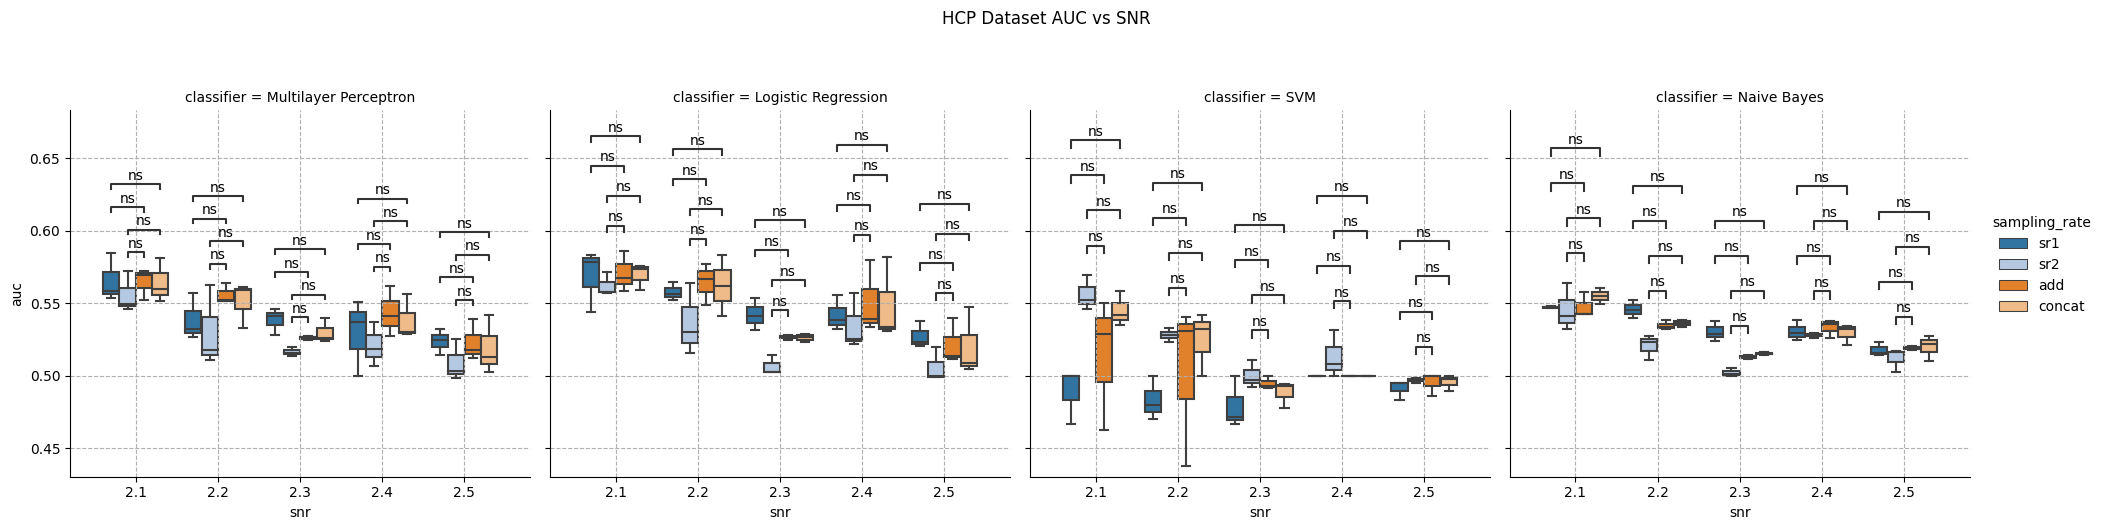

In [ ]:


# Define your variables
x = "snr"
y = "auc"
hue = "sampling_rate"
hue_order = ['sr1', 'sr2', 'add', 'concat']
# snr_levels = [1.5 , 1.6 , 1.7 , 1.8 , 1.9 , 2.0, 2.1, 2.2, 2.3, 2.4, 2.5]
order = snr_levels

# Define a custom color palette
palette = {item: plt.cm.tab20(i) for i, item in enumerate(hue_order)}

# List of classifiers
classifiers = combined_df['classifier'].unique()

# Create the FacetGrid
g = sns.catplot(
    x=x,
    y=y,
    hue=hue,
    hue_order=hue_order,
    col="classifier",
    data=combined_df,
    kind="box",
    palette=palette,
    showfliers=False,
    order=order,
)

# Excluded pairs
excluded_pairs = [{'sr1', 'sr2'}, {'add', 'concat'}]

# Iterate over each axis in the FacetGrid
for ax, classifier in zip(g.axes.flat, classifiers):
    # Filter the data for the current classifier
    data_filtered = combined_df[combined_df['classifier'] == classifier]
    
    # Generate pairs for comparisons specific to the filtered data
    pairs = []
    for snr_level in order:
        for pair in combinations(hue_order, 2):
            if not set(pair) in excluded_pairs:  # Exclude specific pairs
                pairs.append(((snr_level, pair[0]), (snr_level, pair[1])))

    # Annotate the plot
    annotator = Annotator(ax, pairs, data=data_filtered, x=x, y=y, hue=hue, order=order, hue_order=hue_order)
    annotator.configure(test='Mann-Whitney', verbose=2)
    annotator.apply_and_annotate()

# Add a super title
g.fig.suptitle("HCP Dataset AUC vs SNR", y=1.05)

# Adjust the layout
plt.subplots_adjust(top=0.85)

# Add grid
for ax in g.axes.flat:
    ax.grid(True, which='both', axis='both', linestyle='--')

# Save the combined plot
plt.savefig('hcp_hue_layout_combined.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


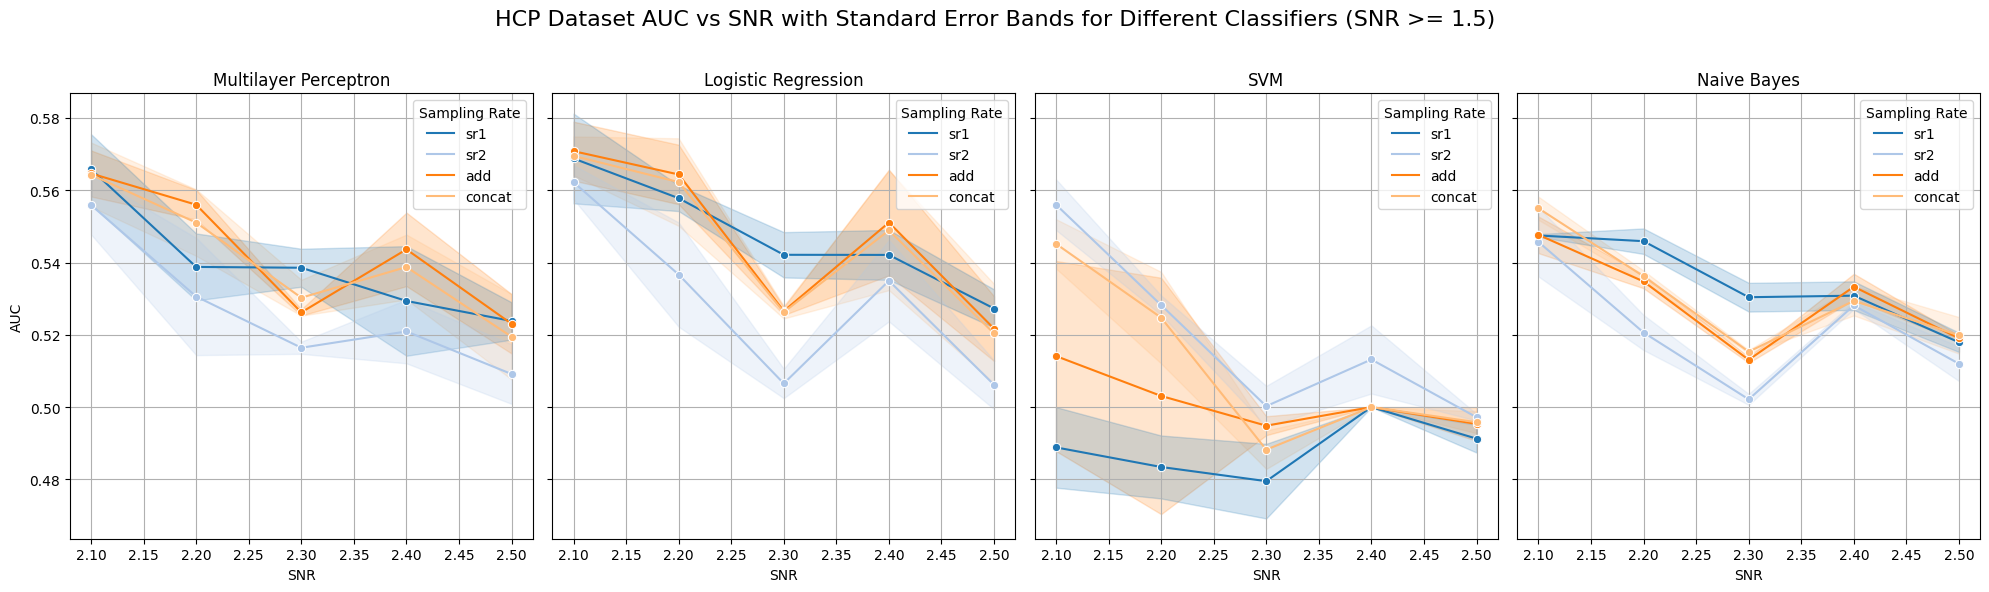

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming your data is already in these DataFrames
classifier_dfs = {
    'Multilayer Perceptron': mlp_df,
    'Logistic Regression': lr_df,
    'SVM': svm_df,
    'Naive Bayes': nb_df
}

# Define your variables
x = "snr"
y = "auc"
hue = "sampling_rate"
hue_order = ['sr1', 'sr2', 'add', 'concat']
snr_levels = [1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5]
order = snr_levels

# Define a custom color palette
palette = {item: plt.cm.tab20(i) for i, item in enumerate(hue_order)}

# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 6), sharey=True)

# Iterate over each classifier DataFrame and plot
for ax, (classifier_name, df) in zip(axes, classifier_dfs.items()):
    # Filter data where SNR is greater than or equal to 1.5
    df_filtered = df[df[x] >= 1.5]
    
    # Calculate mean and standard error
    summary_df = df_filtered.groupby([x, hue]).agg(
        mean_auc=(y, 'mean'),
        std_auc=(y, 'std'),
        count=(y, 'count')
    ).reset_index()
    summary_df['se_auc'] = summary_df['std_auc'] / np.sqrt(summary_df['count'])

    # Plotting
    sns.lineplot(
        data=summary_df,
        x=x,
        y='mean_auc',
        hue=hue,
        hue_order=hue_order,
        palette=palette,
        marker='o',
        ax=ax
    )

    # Add error bands manually
    for key, grp in summary_df.groupby(hue):
        color = palette[key]
        ax.fill_between(grp[x], grp['mean_auc'] - grp['se_auc'], grp['mean_auc'] + grp['se_auc'], color=color, alpha=0.2)

    ax.set_title(f'{classifier_name}')
    ax.set_xlabel('SNR')
    if ax == axes[0]:
        ax.set_ylabel('AUC')
    ax.legend(title='Sampling Rate')
    ax.grid(True)

plt.suptitle('HCP Dataset AUC vs SNR with Standard Error Bands for Different Classifiers (SNR >= 1.5)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the main title
plt.show()


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2.0_sr2 vs. 2.0_add: Wilcoxon test (paired samples), P_val:2.500e-01 Stat=0.000e+00
2.1_sr2 vs. 2.1_add: Wilcoxon test (paired samples), P_val:5.000e-01 Stat=1.000e+00
2.2_sr2 vs. 2.2_add: Wilcoxon test (paired samples), P_val:2.500e-01 Stat=0.000e+00
2.3_sr2 vs. 2.3_add: Wilcoxon test (paired samples), P_val:5.000e-01 Stat=1.000e+00
2.4_sr2 vs. 2.4_add: Wilcoxon test (paired samples), P_val:1.000e+00 Stat=3.000e+00
2.5_sr2 vs. 2.5_add: Wilcoxon test (paired samples), P_val:5.000e-01 Stat=1.000e+00
1.7_add vs. 1.7_concat: Wilcoxon test (paired samples), P_val:1.000e+00 Stat=3.000e+00
1.8_sr1 vs. 1.8_sr2: Wilcoxon test (paired samples), P_val:2.500e-01 Stat=0.000e+00
1.8_add vs. 1.8_concat: Wilcoxon test (paired samples), P_val:7.500e-01 Stat=2.000e+00
1.9_sr1 vs. 1.9_sr2: Wilcoxon test (paired sam

/data/users2/jwardell1/miniconda3/envs/usp/lib/python3.11/site-packages/scipy/stats/_wilcoxon.py:198: UserWarning: Sample size too small for normal approximation.
  temp = _wilcoxon_iv(x, y, zero_method, correction, alternative, method, axis)
/data/users2/jwardell1/miniconda3/envs/usp/lib/python3.11/site-packages/scipy/stats/_wilcoxon.py:198: UserWarning: Sample size too small for normal approximation.
  temp = _wilcoxon_iv(x, y, zero_method, correction, alternative, method, axis)


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2.0_sr2 vs. 2.0_add: Wilcoxon test (paired samples), P_val:2.500e-01 Stat=0.000e+00
2.1_sr2 vs. 2.1_add: Wilcoxon test (paired samples), P_val:2.500e-01 Stat=0.000e+00
2.2_sr2 vs. 2.2_add: Wilcoxon test (paired samples), P_val:5.000e-01 Stat=1.000e+00
2.3_sr2 vs. 2.3_add: Wilcoxon test (paired samples), P_val:2.500e-01 Stat=0.000e+00
2.4_sr2 vs. 2.4_add: Wilcoxon test (paired samples), P_val:6.547e-01 Stat=1.000e+00
1.7_add vs. 1.7_concat: Wilcoxon test (paired samples), P_val:7.500e-01 Stat=2.000e+00
1.8_sr1 vs. 1.8_sr2: Wilcoxon test (paired samples), P_val:1.000e+00 Stat=3.000e+00
1.8_add vs. 1.8_concat: Wilcoxon test (paired samples), P_val:7.500e-01 Stat=2.000e+00
1.9_sr1 vs. 1.9_sr2: Wilcoxon test (paired samples), P_val:1.000e+00 Stat=3.000e+00
1.9_sr2 vs. 1.9_add: Wilcoxon test (paired sam

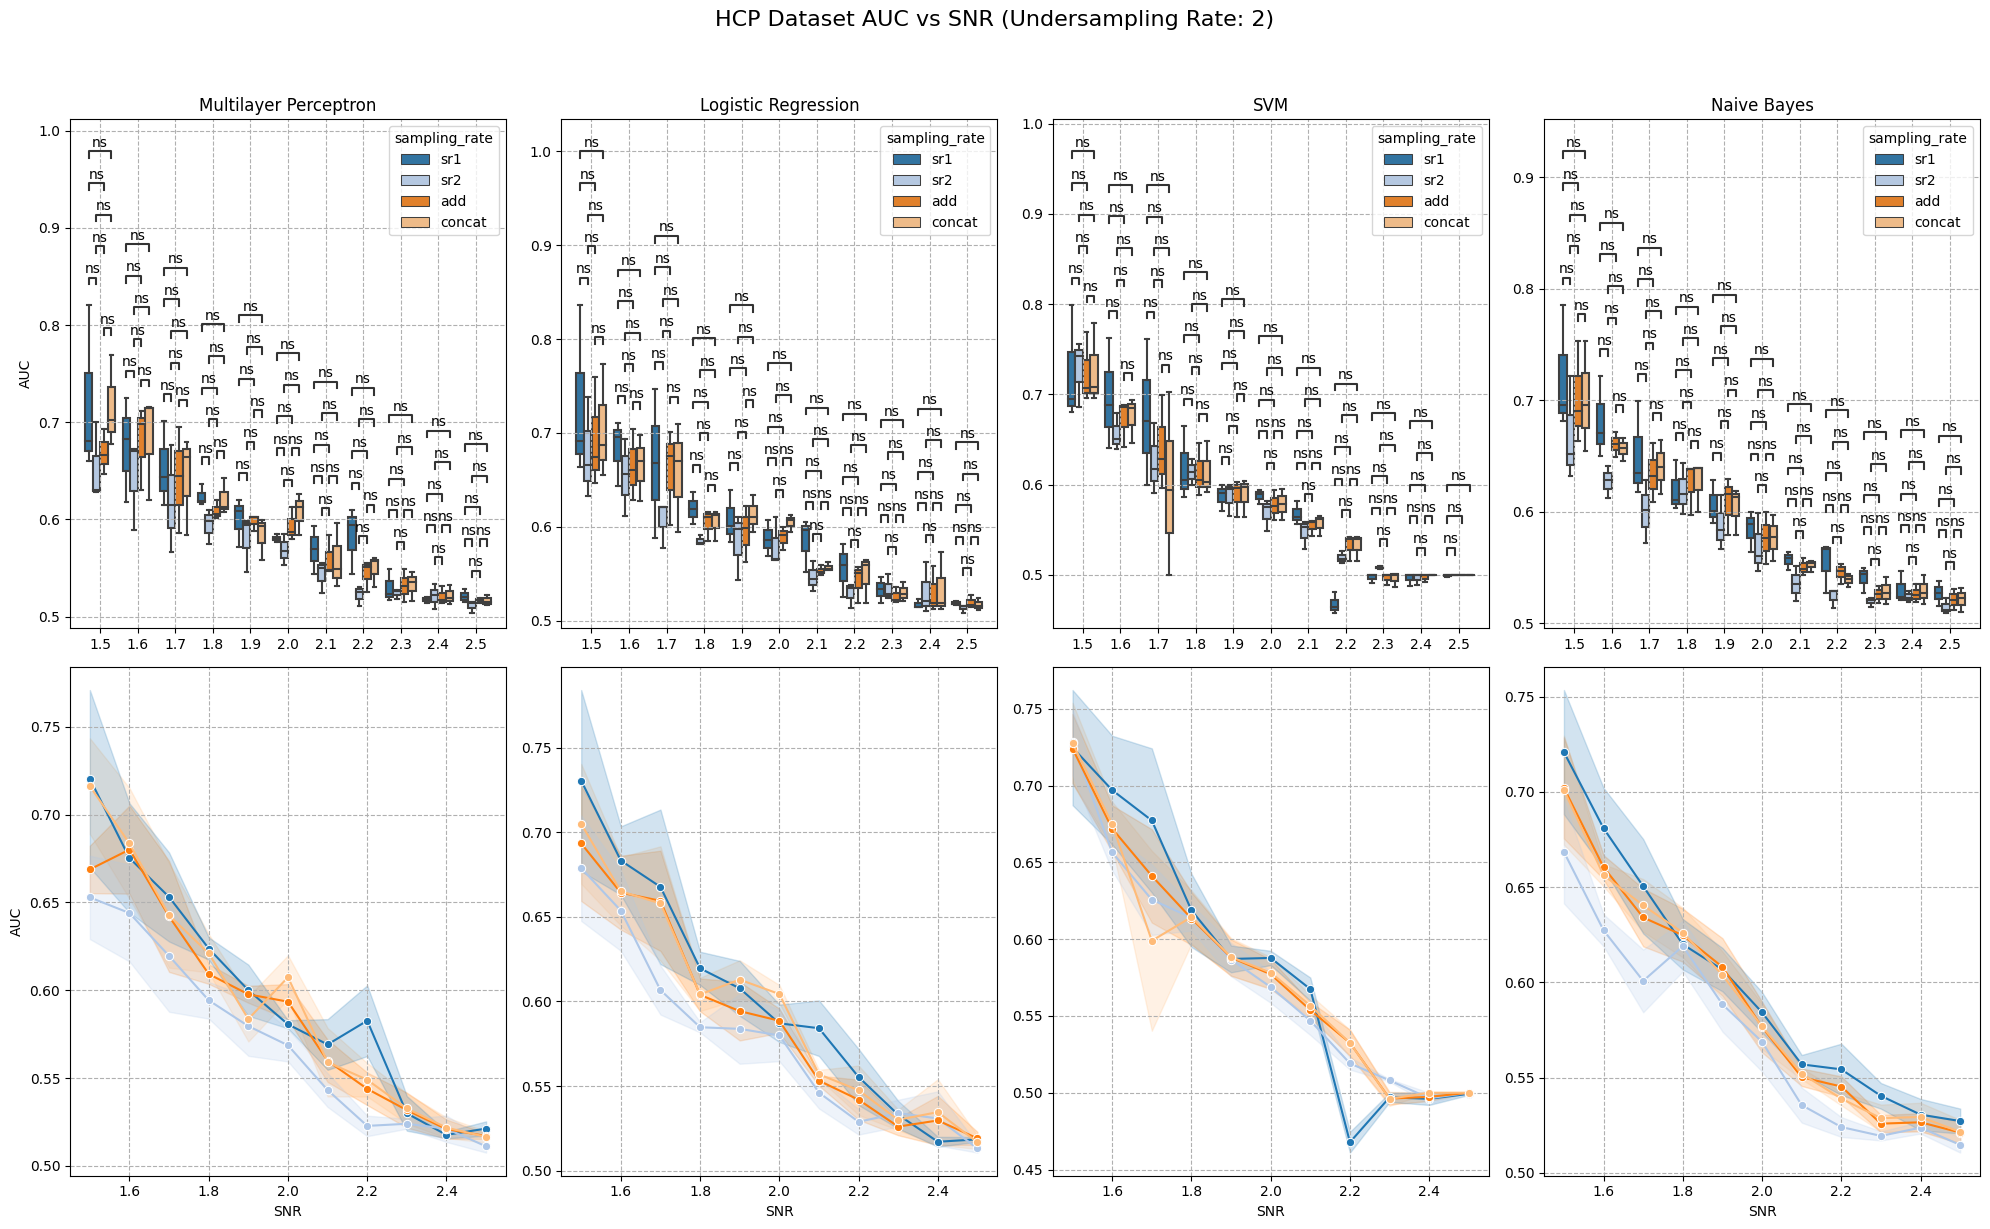

/data/users2/jwardell1/miniconda3/envs/usp/lib/python3.11/site-packages/scipy/stats/_wilcoxon.py:198: UserWarning: Sample size too small for normal approximation.
  temp = _wilcoxon_iv(x, y, zero_method, correction, alternative, method, axis)
/data/users2/jwardell1/miniconda3/envs/usp/lib/python3.11/site-packages/scipy/stats/_wilcoxon.py:198: UserWarning: Sample size too small for normal approximation.
  temp = _wilcoxon_iv(x, y, zero_method, correction, alternative, method, axis)


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2.0_sr2 vs. 2.0_add: Wilcoxon test (paired samples), P_val:2.500e-01 Stat=0.000e+00
2.1_sr2 vs. 2.1_add: Wilcoxon test (paired samples), P_val:5.000e-01 Stat=1.000e+00
2.2_sr2 vs. 2.2_add: Wilcoxon test (paired samples), P_val:7.500e-01 Stat=2.000e+00
2.3_sr2 vs. 2.3_add: Wilcoxon test (paired samples), P_val:2.500e-01 Stat=0.000e+00
2.4_sr2 vs. 2.4_add: Wilcoxon test (paired samples), P_val:2.500e-01 Stat=0.000e+00
2.5_sr2 vs. 2.5_add: Wilcoxon test (paired samples), P_val:2.500e-01 Stat=0.000e+00
1.7_add vs. 1.7_concat: Wilcoxon test (paired samples), P_val:7.500e-01 Stat=2.000e+00
1.8_sr1 vs. 1.8_sr2: Wilcoxon test (paired samples), P_val:2.500e-01 Stat=0.000e+00
1.8_add vs. 1.8_concat: Wilcoxon test (paired samples), P_val:7.500e-01 Stat=2.000e+00
1.9_sr1 vs. 1.9_sr2: Wilcoxon test (paired sam

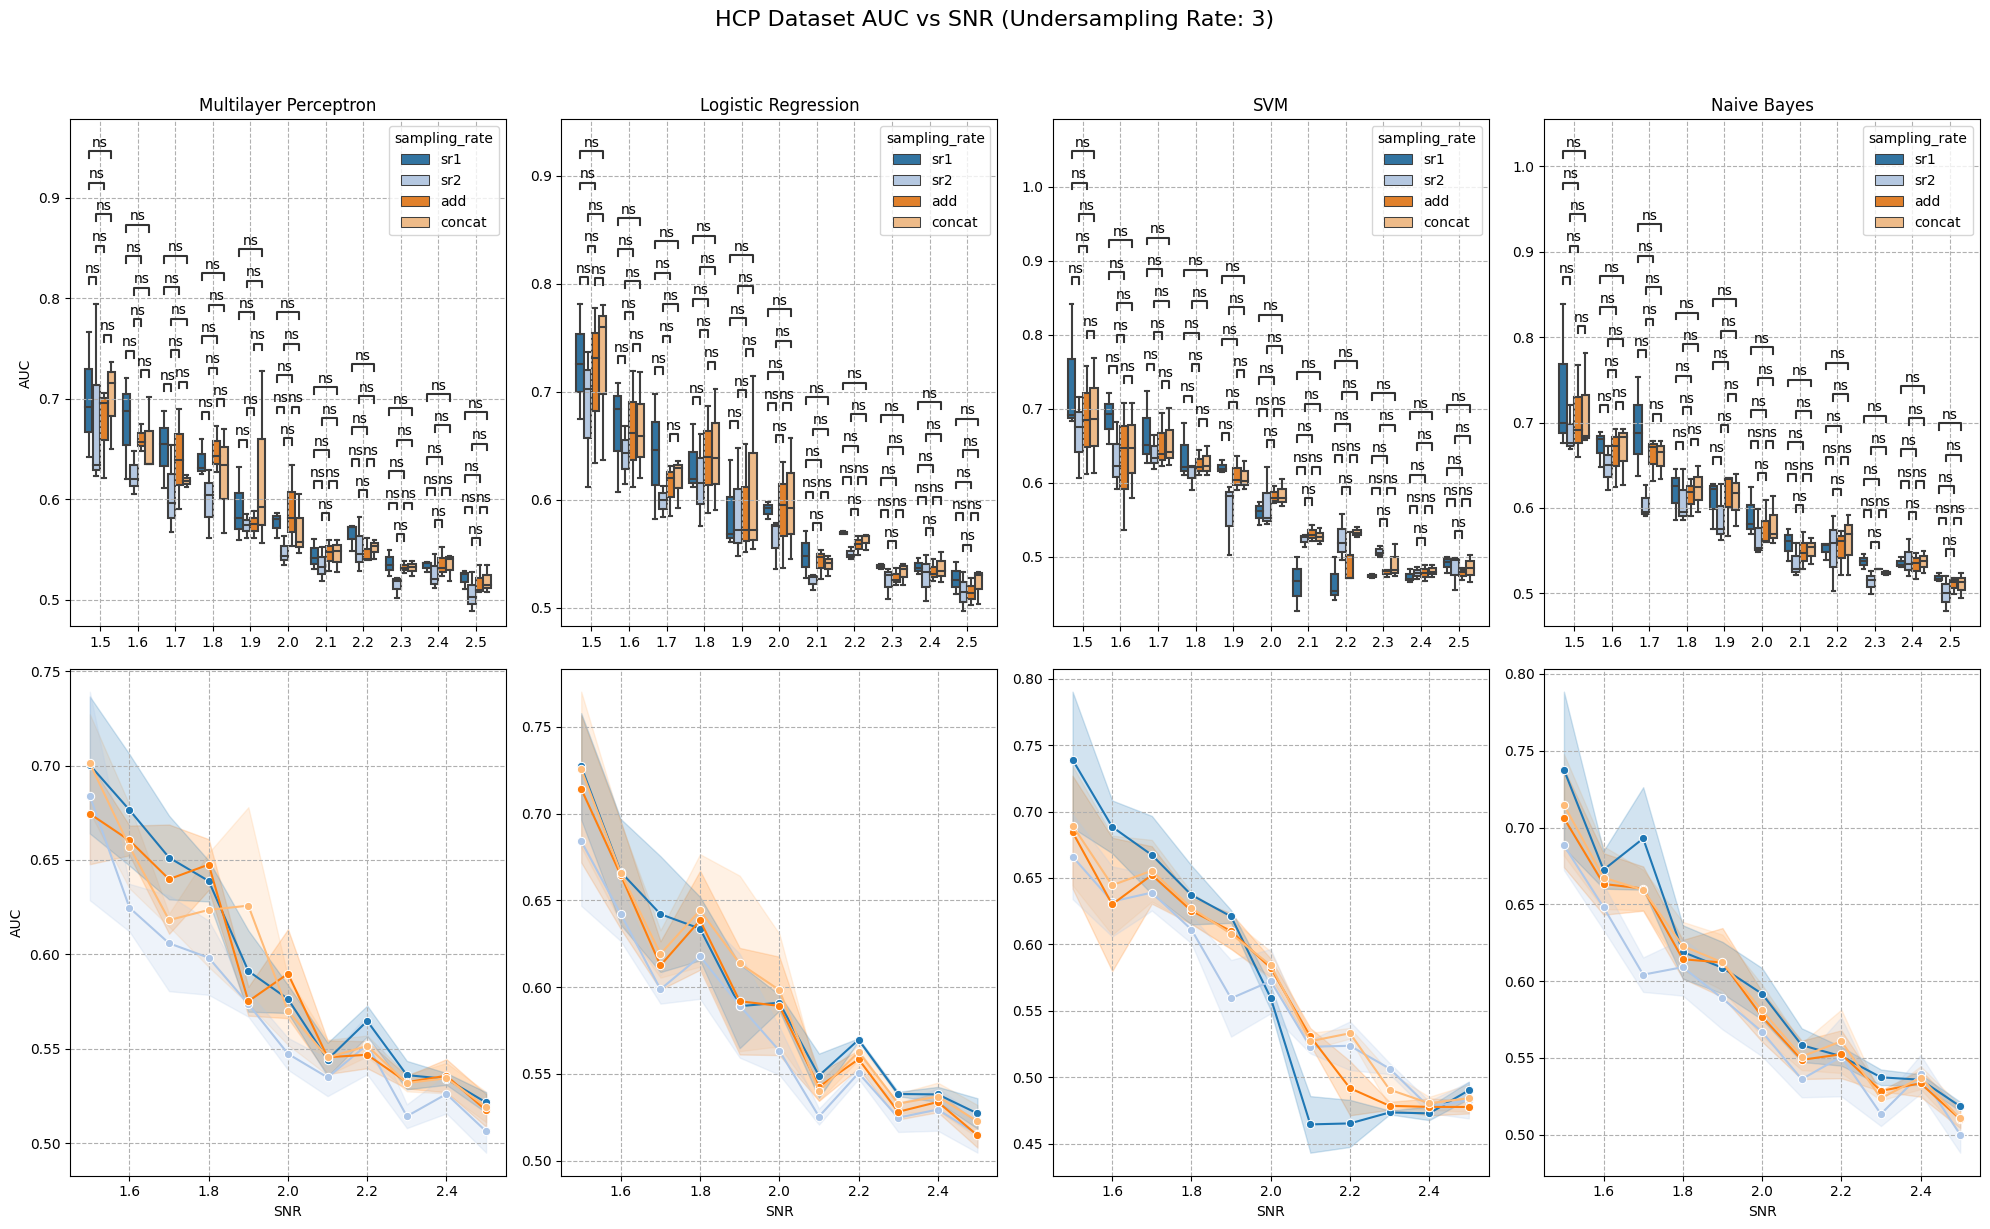

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2.0_sr2 vs. 2.0_add: Wilcoxon test (paired samples), P_val:2.500e-01 Stat=0.000e+00
2.1_sr2 vs. 2.1_add: Wilcoxon test (paired samples), P_val:5.000e-01 Stat=1.000e+00
2.2_sr2 vs. 2.2_add: Wilcoxon test (paired samples), P_val:7.500e-01 Stat=2.000e+00
2.3_sr2 vs. 2.3_add: Wilcoxon test (paired samples), P_val:2.500e-01 Stat=0.000e+00
2.4_sr2 vs. 2.4_add: Wilcoxon test (paired samples), P_val:5.000e-01 Stat=1.000e+00
2.5_sr2 vs. 2.5_add: Wilcoxon test (paired samples), P_val:5.000e-01 Stat=1.000e+00
1.7_add vs. 1.7_concat: Wilcoxon test (paired samples), P_val:2.500e-01 Stat=0.000e+00
1.8_sr1 vs. 1.8_sr2: Wilcoxon test (paired samples), P_val:5.000e-01 Stat=1.000e+00
1.8_add vs. 1.8_concat: Wilcoxon test (paired samples), P_val:5.000e-01 Stat=1.000e+00
1.9_sr1 vs. 1.9_sr2: Wilcoxon test (paired sam

/data/users2/jwardell1/miniconda3/envs/usp/lib/python3.11/site-packages/scipy/stats/_wilcoxon.py:198: UserWarning: Sample size too small for normal approximation.
  temp = _wilcoxon_iv(x, y, zero_method, correction, alternative, method, axis)
/data/users2/jwardell1/miniconda3/envs/usp/lib/python3.11/site-packages/scipy/stats/_wilcoxon.py:198: UserWarning: Sample size too small for normal approximation.
  temp = _wilcoxon_iv(x, y, zero_method, correction, alternative, method, axis)


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2.0_sr2 vs. 2.0_add: Wilcoxon test (paired samples), P_val:2.500e-01 Stat=0.000e+00
2.1_sr2 vs. 2.1_add: Wilcoxon test (paired samples), P_val:7.500e-01 Stat=2.000e+00
2.2_sr2 vs. 2.2_add: Wilcoxon test (paired samples), P_val:2.500e-01 Stat=0.000e+00
2.3_sr2 vs. 2.3_add: Wilcoxon test (paired samples), P_val:2.500e-01 Stat=0.000e+00
2.4_sr2 vs. 2.4_add: Wilcoxon test (paired samples), P_val:2.500e-01 Stat=0.000e+00
2.5_sr2 vs. 2.5_add: Wilcoxon test (paired samples), P_val:3.173e-01 Stat=0.000e+00
1.7_add vs. 1.7_concat: Wilcoxon test (paired samples), P_val:7.500e-01 Stat=2.000e+00
1.8_sr1 vs. 1.8_sr2: Wilcoxon test (paired samples), P_val:2.500e-01 Stat=0.000e+00
1.8_add vs. 1.8_concat: Wilcoxon test (paired samples), P_val:5.000e-01 Stat=1.000e+00
1.9_sr1 vs. 1.9_sr2: Wilcoxon test (paired sam

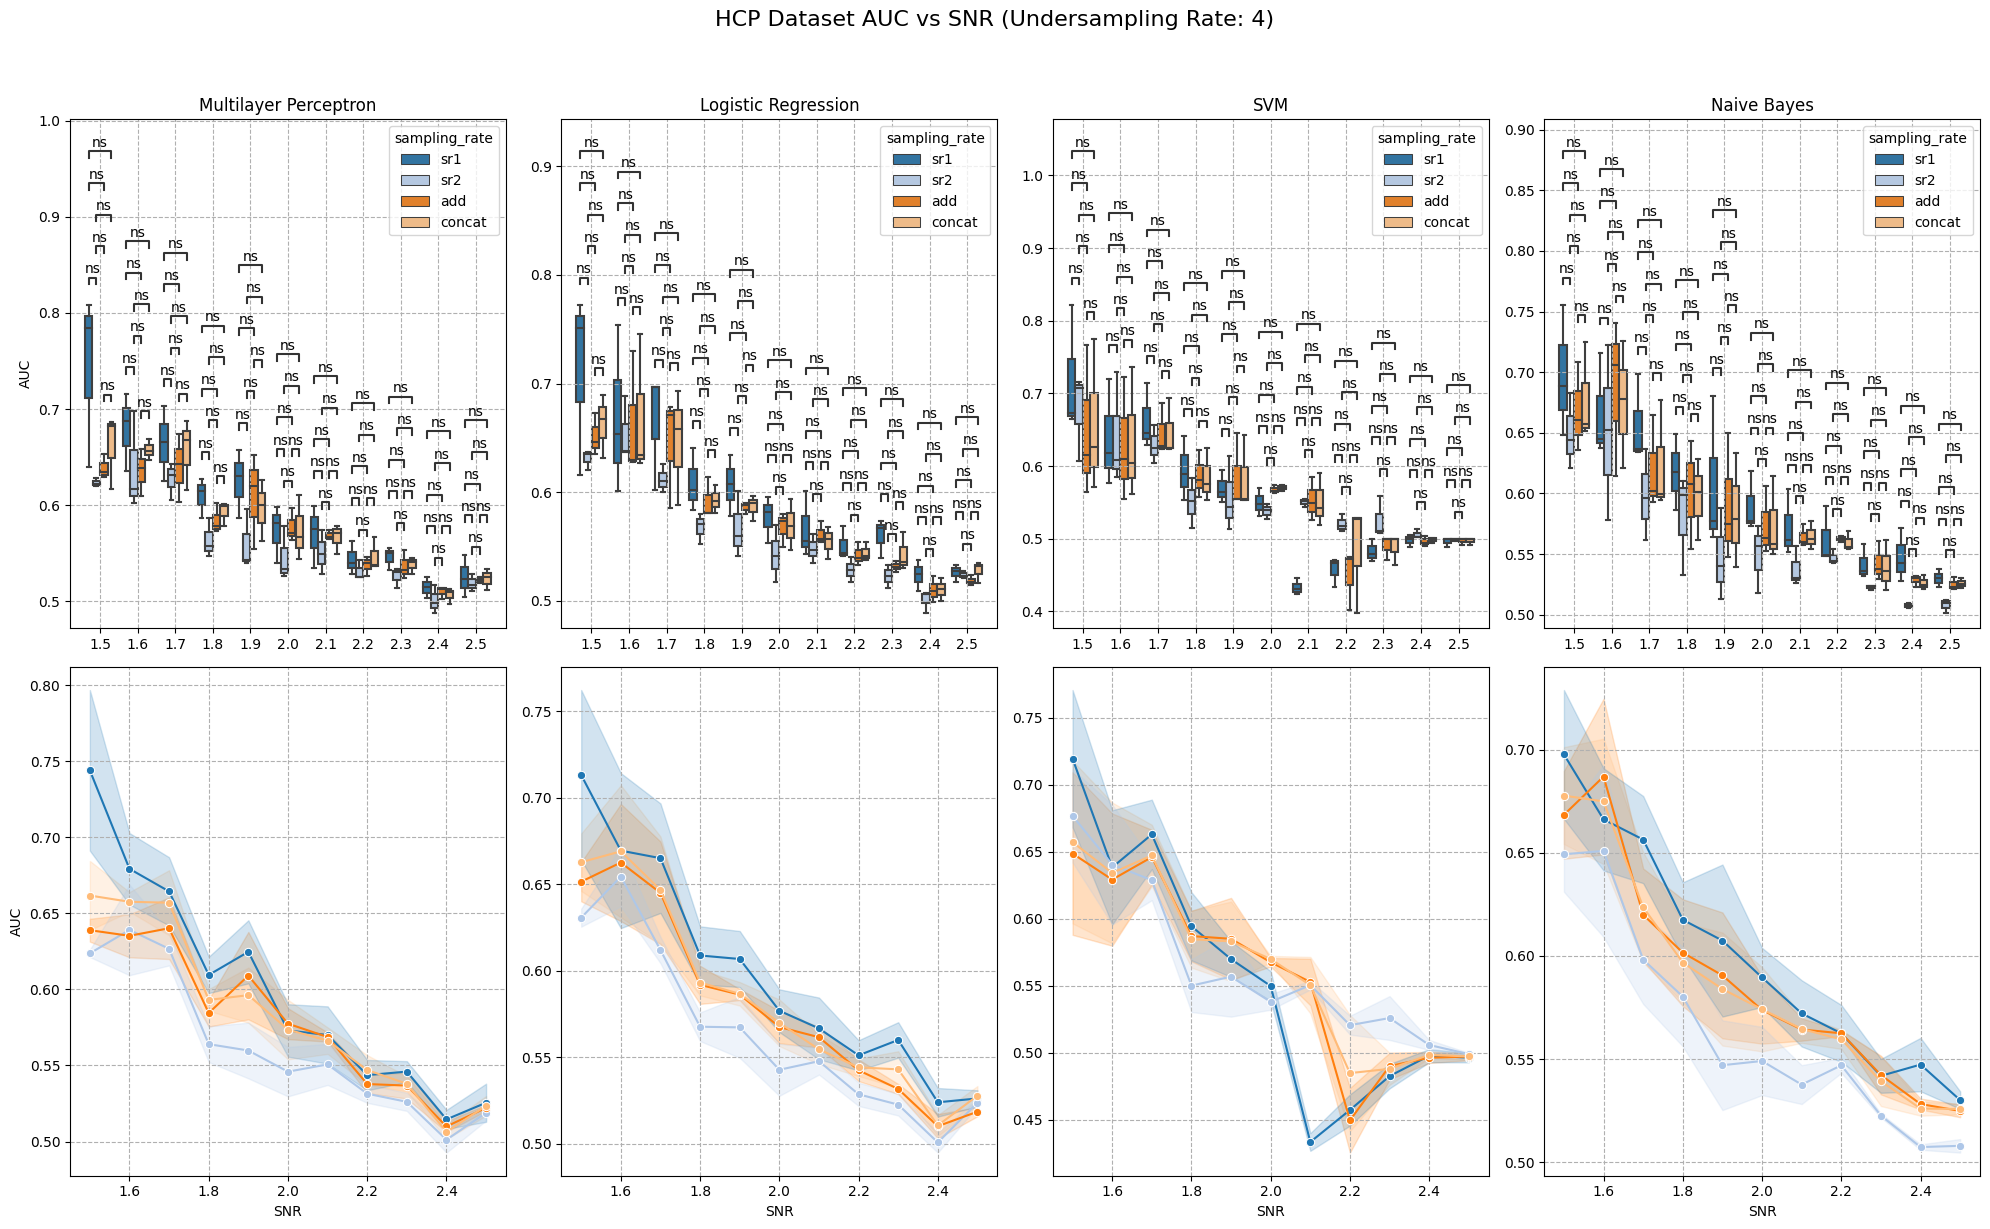

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2.0_sr2 vs. 2.0_add: Wilcoxon test (paired samples), P_val:7.500e-01 Stat=2.000e+00
2.1_sr2 vs. 2.1_add: Wilcoxon test (paired samples), P_val:2.500e-01 Stat=0.000e+00
2.2_sr2 vs. 2.2_add: Wilcoxon test (paired samples), P_val:2.500e-01 Stat=0.000e+00
2.3_sr2 vs. 2.3_add: Wilcoxon test (paired samples), P_val:2.500e-01 Stat=0.000e+00
2.4_sr2 vs. 2.4_add: Wilcoxon test (paired samples), P_val:2.500e-01 Stat=0.000e+00
2.5_sr2 vs. 2.5_add: Wilcoxon test (paired samples), P_val:5.000e-01 Stat=1.000e+00
1.7_add vs. 1.7_concat: Wilcoxon test (paired samples), P_val:5.000e-01 Stat=1.000e+00
1.8_sr1 vs. 1.8_sr2: Wilcoxon test (paired samples), P_val:2.500e-01 Stat=0.000e+00
1.8_add vs. 1.8_concat: Wilcoxon test (paired samples), P_val:2.500e-01 Stat=0.000e+00
1.9_sr1 vs. 1.9_sr2: Wilcoxon test (paired sam

/data/users2/jwardell1/miniconda3/envs/usp/lib/python3.11/site-packages/scipy/stats/_wilcoxon.py:198: UserWarning: Sample size too small for normal approximation.
  temp = _wilcoxon_iv(x, y, zero_method, correction, alternative, method, axis)
/data/users2/jwardell1/miniconda3/envs/usp/lib/python3.11/site-packages/scipy/stats/_wilcoxon.py:198: UserWarning: Sample size too small for normal approximation.
  temp = _wilcoxon_iv(x, y, zero_method, correction, alternative, method, axis)


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2.0_sr2 vs. 2.0_add: Wilcoxon test (paired samples), P_val:1.000e+00 Stat=3.000e+00
2.1_sr2 vs. 2.1_add: Wilcoxon test (paired samples), P_val:7.500e-01 Stat=2.000e+00
2.2_sr2 vs. 2.2_add: Wilcoxon test (paired samples), P_val:2.500e-01 Stat=0.000e+00
2.3_sr2 vs. 2.3_add: Wilcoxon test (paired samples), P_val:7.500e-01 Stat=2.000e+00
2.4_sr2 vs. 2.4_add: Wilcoxon test (paired samples), P_val:7.500e-01 Stat=2.000e+00
1.7_add vs. 1.7_concat: Wilcoxon test (paired samples), P_val:2.500e-01 Stat=0.000e+00
1.8_sr1 vs. 1.8_sr2: Wilcoxon test (paired samples), P_val:2.500e-01 Stat=0.000e+00
1.8_add vs. 1.8_concat: Wilcoxon test (paired samples), P_val:1.000e+00 Stat=3.000e+00
1.9_sr1 vs. 1.9_sr2: Wilcoxon test (paired samples), P_val:2.500e-01 Stat=0.000e+00
1.9_sr2 vs. 1.9_add: Wilcoxon test (paired sam

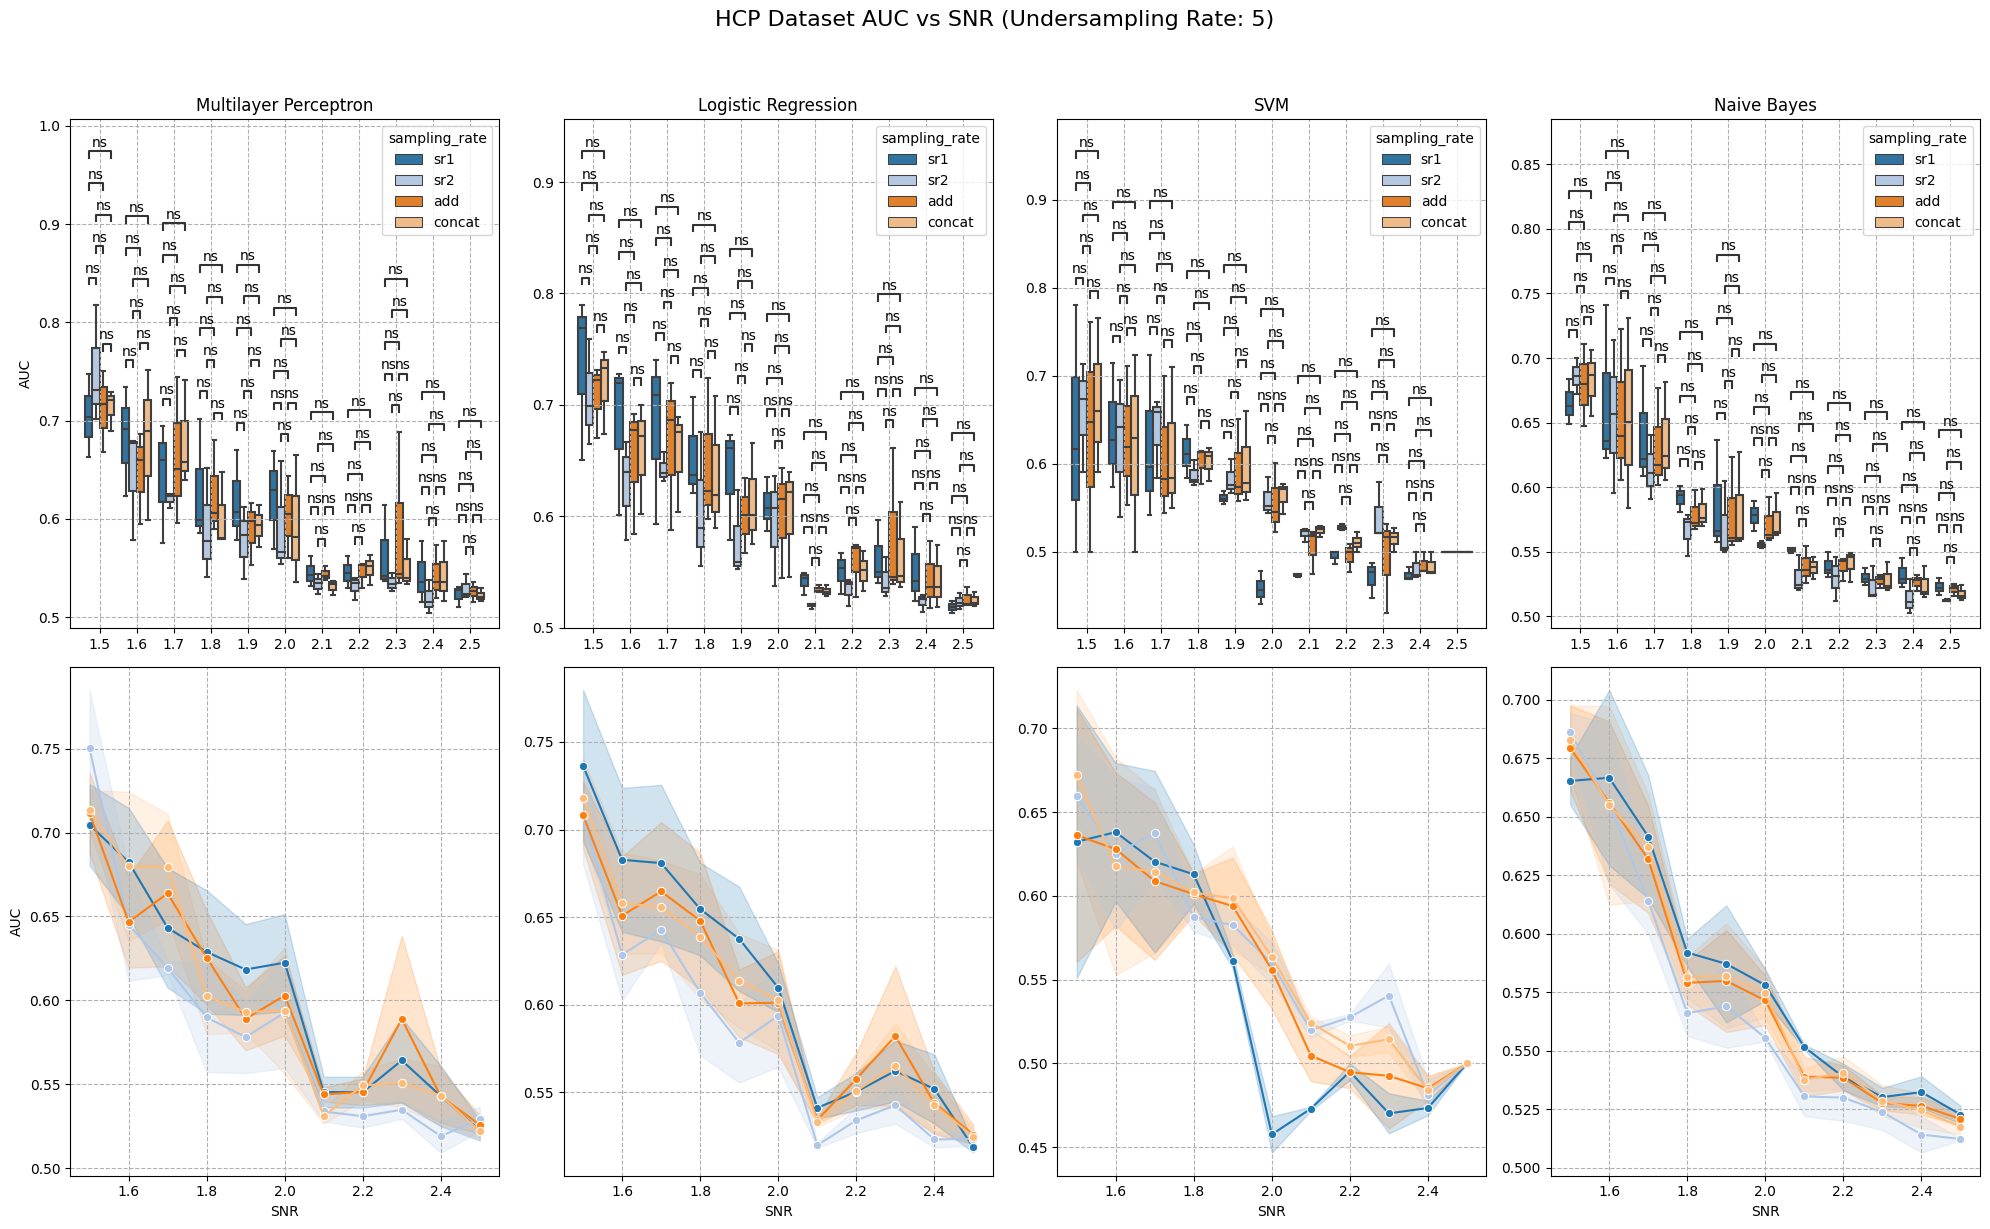

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2.0_sr2 vs. 2.0_add: Wilcoxon test (paired samples), P_val:2.500e-01 Stat=0.000e+00
2.1_sr2 vs. 2.1_add: Wilcoxon test (paired samples), P_val:5.000e-01 Stat=1.000e+00
2.2_sr2 vs. 2.2_add: Wilcoxon test (paired samples), P_val:5.000e-01 Stat=1.000e+00
2.3_sr2 vs. 2.3_add: Wilcoxon test (paired samples), P_val:2.500e-01 Stat=0.000e+00
2.4_sr2 vs. 2.4_add: Wilcoxon test (paired samples), P_val:2.500e-01 Stat=0.000e+00
2.5_sr2 vs. 2.5_add: Wilcoxon test (paired samples), P_val:2.500e-01 Stat=0.000e+00
1.7_add vs. 1.7_concat: Wilcoxon test (paired samples), P_val:5.000e-01 Stat=1.000e+00
1.8_sr1 vs. 1.8_sr2: Wilcoxon test (paired samples), P_val:2.500e-01 Stat=0.000e+00
1.8_add vs. 1.8_concat: Wilcoxon test (paired samples), P_val:2.500e-01 Stat=0.000e+00
1.9_sr1 vs. 1.9_sr2: Wilcoxon test (paired sam

/data/users2/jwardell1/miniconda3/envs/usp/lib/python3.11/site-packages/scipy/stats/_wilcoxon.py:198: UserWarning: Sample size too small for normal approximation.
  temp = _wilcoxon_iv(x, y, zero_method, correction, alternative, method, axis)
/data/users2/jwardell1/miniconda3/envs/usp/lib/python3.11/site-packages/scipy/stats/_wilcoxon.py:198: UserWarning: Sample size too small for normal approximation.
  temp = _wilcoxon_iv(x, y, zero_method, correction, alternative, method, axis)


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2.0_sr2 vs. 2.0_add: Wilcoxon test (paired samples), P_val:2.500e-01 Stat=0.000e+00
2.1_sr2 vs. 2.1_add: Wilcoxon test (paired samples), P_val:2.500e-01 Stat=0.000e+00
2.2_sr2 vs. 2.2_add: Wilcoxon test (paired samples), P_val:2.500e-01 Stat=0.000e+00
2.3_sr2 vs. 2.3_add: Wilcoxon test (paired samples), P_val:2.500e-01 Stat=0.000e+00
2.4_sr2 vs. 2.4_add: Wilcoxon test (paired samples), P_val:2.500e-01 Stat=0.000e+00
2.5_sr2 vs. 2.5_add: Wilcoxon test (paired samples), P_val:2.500e-01 Stat=0.000e+00
1.7_add vs. 1.7_concat: Wilcoxon test (paired samples), P_val:5.000e-01 Stat=1.000e+00
1.8_sr1 vs. 1.8_sr2: Wilcoxon test (paired samples), P_val:7.500e-01 Stat=2.000e+00
1.8_add vs. 1.8_concat: Wilcoxon test (paired samples), P_val:1.000e+00 Stat=3.000e+00
1.9_sr1 vs. 1.9_sr2: Wilcoxon test (paired sam

/data/users2/jwardell1/miniconda3/envs/usp/lib/python3.11/site-packages/scipy/stats/_wilcoxon.py:198: UserWarning: Sample size too small for normal approximation.
  temp = _wilcoxon_iv(x, y, zero_method, correction, alternative, method, axis)
/data/users2/jwardell1/miniconda3/envs/usp/lib/python3.11/site-packages/scipy/stats/_wilcoxon.py:198: UserWarning: Sample size too small for normal approximation.
  temp = _wilcoxon_iv(x, y, zero_method, correction, alternative, method, axis)


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2.0_sr2 vs. 2.0_add: Wilcoxon test (paired samples), P_val:2.500e-01 Stat=0.000e+00
2.1_sr2 vs. 2.1_add: Wilcoxon test (paired samples), P_val:2.500e-01 Stat=0.000e+00
2.2_sr2 vs. 2.2_add: Wilcoxon test (paired samples), P_val:1.000e+00 Stat=3.000e+00
2.3_sr2 vs. 2.3_add: Wilcoxon test (paired samples), P_val:5.000e-01 Stat=1.000e+00
2.4_sr2 vs. 2.4_add: Wilcoxon test (paired samples), P_val:1.797e-01 Stat=0.000e+00
2.5_sr2 vs. 2.5_add: Wilcoxon test (paired samples), P_val:1.000e+00 Stat=3.000e+00
1.7_add vs. 1.7_concat: Wilcoxon test (paired samples), P_val:7.500e-01 Stat=2.000e+00
1.8_sr1 vs. 1.8_sr2: Wilcoxon test (paired samples), P_val:1.000e+00 Stat=3.000e+00
1.8_add vs. 1.8_concat: Wilcoxon test (paired samples), P_val:2.500e-01 Stat=0.000e+00
1.9_sr1 vs. 1.9_sr2: Wilcoxon test (paired sam

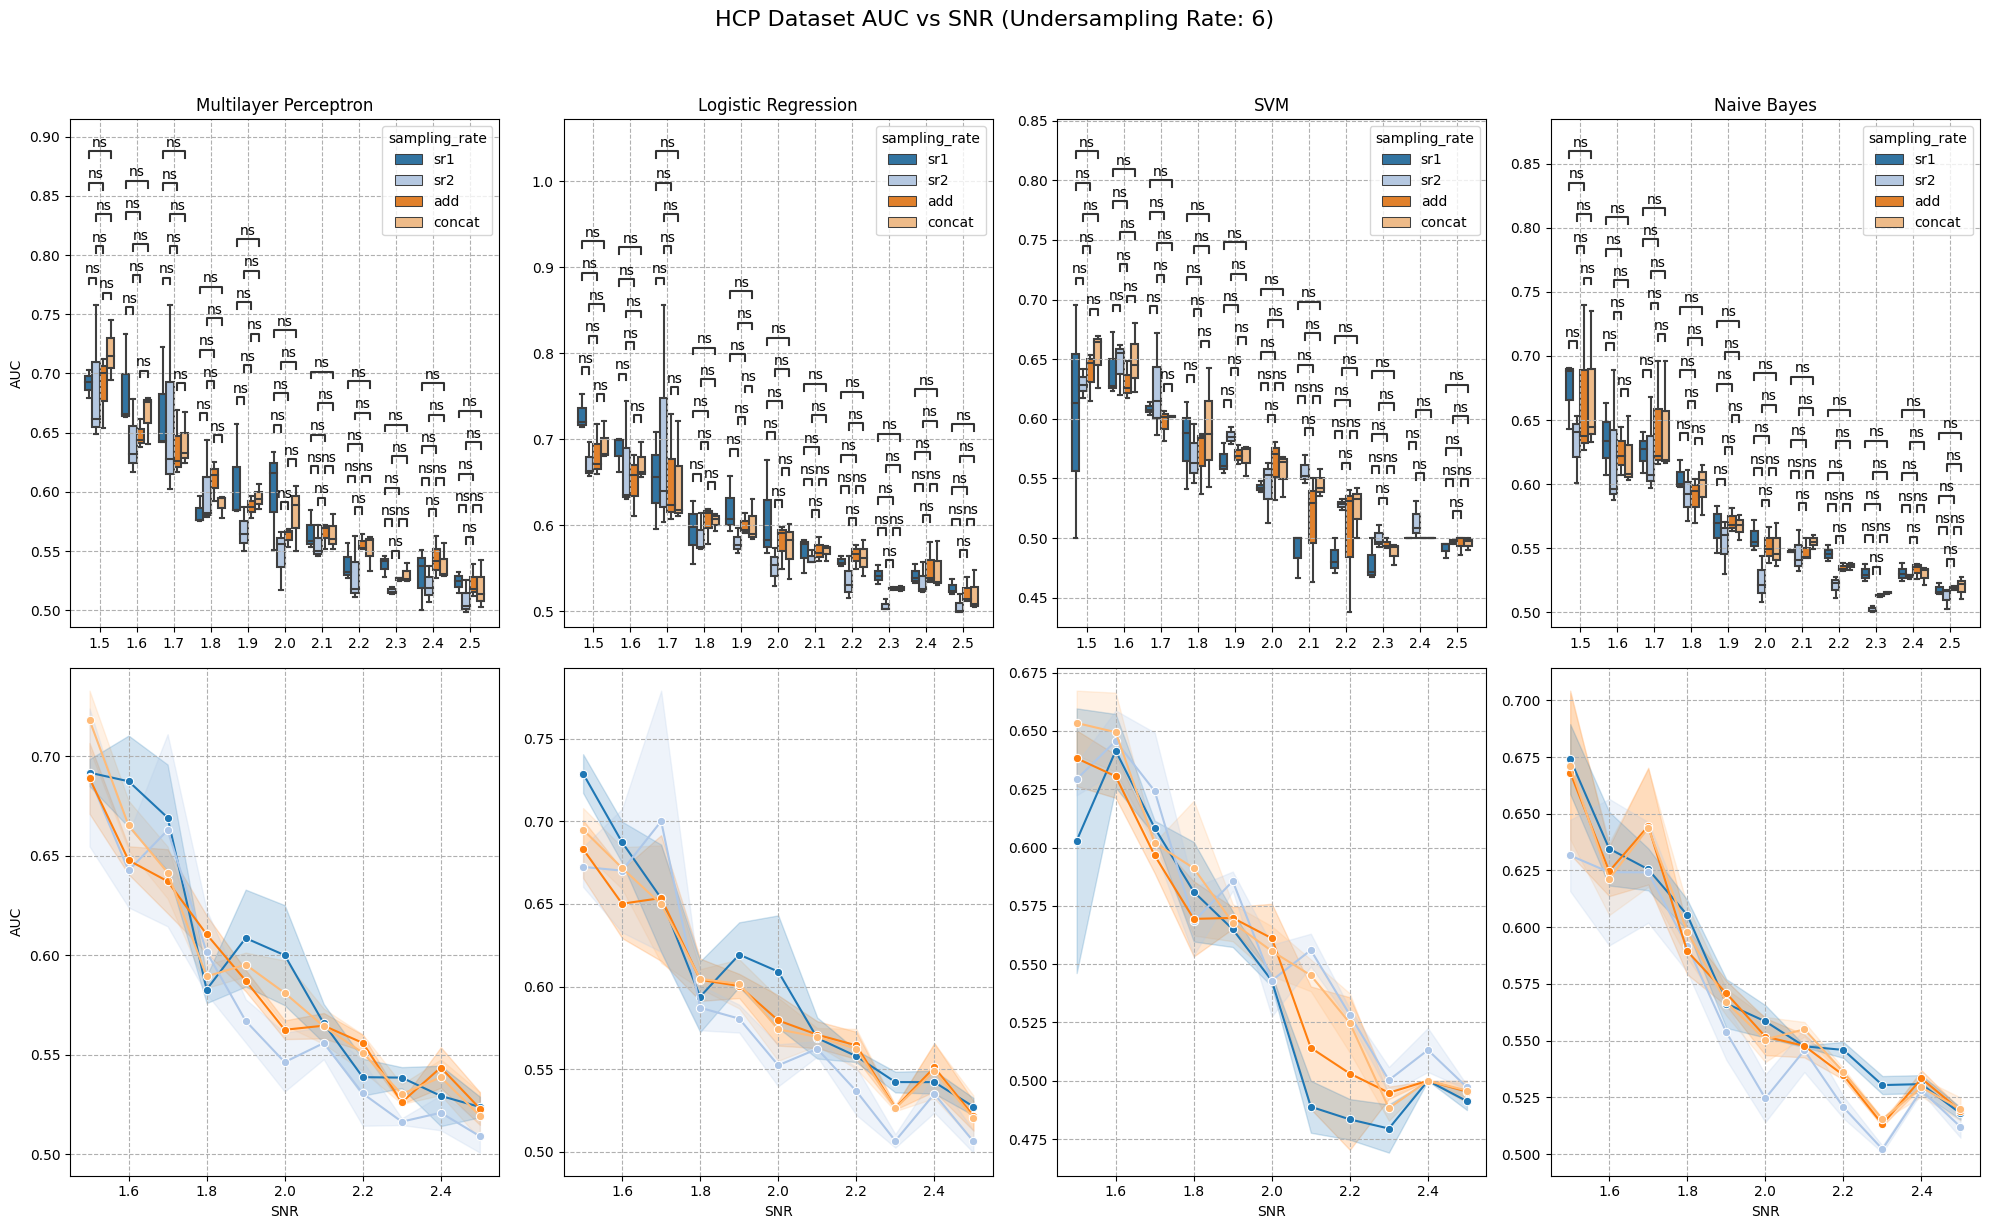

In [6]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from statannotations.Annotator import Annotator
import numpy as np
from scipy.stats import wilcoxon

# Loop through each undersampling rate
for undersampling_rate in range(2, 7):
    # Define the directory for the current undersampling rate
    pkl_dir = f'/data/users2/jwardell1/undersampling-project/HCP/pkl-files/us-{undersampling_rate}'

    # Read and concatenate sr1 data
    joined_files = os.path.join(pkl_dir, 'sr1_*.pkl')
    joined_list = glob.glob(joined_files)
    sr1 = pd.concat((pd.read_pickle(file).assign(sampling_rate='sr1') for file in joined_list), ignore_index=True)

    # Read and concatenate sr2 data
    joined_files = os.path.join(pkl_dir, 'sr2_*.pkl')
    joined_list = glob.glob(joined_files)
    sr2 = pd.concat((pd.read_pickle(file).assign(sampling_rate='sr2') for file in joined_list), ignore_index=True)

    # Read and concatenate concat data
    joined_files = os.path.join(pkl_dir, 'concat_*.pkl')
    joined_list = glob.glob(joined_files)
    concat = pd.concat((pd.read_pickle(file).assign(sampling_rate='concat') for file in joined_list), ignore_index=True)

    # Read and concatenate add data
    joined_files = os.path.join(pkl_dir, 'add_*.pkl')
    joined_list = glob.glob(joined_files)
    add = pd.concat((pd.read_pickle(file).assign(sampling_rate='add') for file in joined_list), ignore_index=True)

    # Concatenate all dataframes
    all_data = pd.concat([sr1, sr2, concat, add], ignore_index=True)

    # Function to split each row into multiple rows based on cross-validation index
    def split_row(row):
        new_rows = []
        for cv_ix, auc in enumerate(row['test_scores']):
            new_row = row.copy()
            new_row['auc'] = auc
            new_row['cv_ix'] = cv_ix
            new_rows.append(new_row)
        return pd.DataFrame(new_rows)

    # Apply the split_row function to each row of the dataframe and concatenate the results
    result_df = pd.concat(all_data.apply(split_row, axis=1).tolist(), ignore_index=True)

    # Drop the original 'test_scores' column as it's no longer needed
    result_df.drop('test_scores', axis=1, inplace=True)

    grouped_classifiers = result_df.groupby('classifier')

    classifier_dfs = {}
    for classifier, group_df in grouped_classifiers:
        classifier_dfs[classifier] = group_df.copy()

    mlp_df = classifier_dfs['Multilayer Perceptron']
    lr_df = classifier_dfs['Logistic Regression']
    svm_df = classifier_dfs['SVM']
    nb_df = classifier_dfs['Naive Bayes']

    dfs = [mlp_df, lr_df, svm_df, nb_df]
    classifiers = ['Multilayer Perceptron', 'Logistic Regression', 'SVM', 'Naive Bayes']
    sampling_rates = ['sr1', 'sr2', 'add', 'concat']
    hue_order = sampling_rates
    palette = {item: plt.cm.tab20(i) for i, item in enumerate(sampling_rates)}

    # Combine all dataframes into one dataframe for plotting
    combined_df = pd.concat(dfs)
    snr_levels = [1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5]

    lower_limit = 1.5
    combined_df = combined_df[combined_df['snr'] >= lower_limit]

    # Define your variables
    x = "snr"
    y = "auc"
    hue = "sampling_rate"
    order = snr_levels

    # Create the figure and the axes
    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 12), gridspec_kw={'height_ratios': [1, 1]})

    for i, classifier in enumerate(classifiers):
        # Filter the data for the current classifier
        data_filtered = combined_df[combined_df['classifier'] == classifier]
        
        # Boxplot
        sns.boxplot(
            x=x, y=y, hue=hue, data=data_filtered, ax=axes[0, i], palette=palette,
            order=order, hue_order=hue_order, showfliers=False
        )

        # Lineplot with error bands
        summary_df = data_filtered.groupby([x, hue]).agg(
            mean_auc=(y, 'mean'),
            std_auc=(y, 'std'),
            count=(y, 'count')
        ).reset_index()
        summary_df['se_auc'] = summary_df['std_auc'] / np.sqrt(summary_df['count'])
        
        sns.lineplot(
            data=summary_df, x=x, y='mean_auc', hue=hue, hue_order=hue_order,
            palette=palette, marker='o', ax=axes[1, i], legend=None
        )
        
        # Add error bands manually
        for key, grp in summary_df.groupby(hue):
            color = palette[key]
            axes[1, i].fill_between(grp[x], grp['mean_auc'] - grp['se_auc'], grp['mean_auc'] + grp['se_auc'], color=color, alpha=0.2)

        axes[0, i].set_title(f'{classifier}')
        axes[0, i].set_xlabel('')
        if i == 0:
            axes[0, i].set_ylabel('AUC')
            axes[1, i].set_ylabel('AUC')
        else:
            axes[0, i].set_ylabel('')
            axes[1, i].set_ylabel('')
        
        axes[1, i].set_xlabel('SNR')
        
        # Generate pairs for comparisons specific to the filtered data
        pairs = []
        for snr_level in order:
            for pair in combinations(hue_order, 2):
                if pair not in [{'sr1', 'sr2'}, {'add', 'concat'}]:  # Exclude specific pairs
                    pairs.append(((snr_level, pair[0]), (snr_level, pair[1])))

        # Function to check if Wilcoxon test can be performed
        def can_perform_wilcoxon(group1, group2):
            try:
                stat, p = wilcoxon(group1, group2)
                return True
            except ValueError:
                return False

        valid_pairs = []
        for pair in pairs:
            snr_level = pair[0][0]
            group1 = data_filtered[(data_filtered[x] == snr_level) & (data_filtered[hue] == pair[0][1])][y]
            group2 = data_filtered[(data_filtered[x] == snr_level) & (data_filtered[hue] == pair[1][1])][y]
            if can_perform_wilcoxon(group1, group2):
                valid_pairs.append(pair)

        # Annotate the plot
        annotator = Annotator(axes[0, i], valid_pairs, data=data_filtered, x=x, y=y, hue=hue, order=order, hue_order=hue_order)
        annotator.configure(test='Wilcoxon', verbose=2)
        annotator.apply_and_annotate()

    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.96])

    # Add a super title
    fig.suptitle(f"HCP Dataset AUC vs SNR (Undersampling Rate: {undersampling_rate})", fontsize=16, y=1.02)

    # Add grid
    for ax_row in axes:
        for ax in ax_row:
            ax.grid(True, which='both', axis='both', linestyle='--')

    # Save the combined plot
    plt.savefig(f'hcp_hue_layout_combined_us_{undersampling_rate}.png', dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2.0_sr2 vs. 2.0_add: Mann-Whitney-Wilcoxon test two-sided, P_val:8.563e-03 U_stat=3.390e+02
2.1_sr2 vs. 2.1_add: Mann-Whitney-Wilcoxon test two-sided, P_val:7.465e-02 U_stat=4.050e+02
2.2_sr2 vs. 2.2_add: Mann-Whitney-Wilcoxon test two-sided, P_val:2.930e-01 U_stat=4.620e+02
2.3_sr2 vs. 2.3_add: Mann-Whitney-Wilcoxon test two-sided, P_val:9.676e-02 U_stat=4.145e+02
2.4_sr2 vs. 2.4_add: Mann-Whitney-Wilcoxon test two-sided, P_val:3.170e-02 U_stat=3.765e+02
2.5_sr2 vs. 2.5_add: Mann-Whitney-Wilcoxon test two-sided, P_val:4.340e-01 U_stat=4.830e+02
1.7_add vs. 1.7_concat: Mann-Whitney-Wilcoxon test two-sided, P_val:6.535e-01 U_stat=5.800e+02
1.8_sr1 vs. 1.8_sr2: Mann-Whitney-Wilcoxon test two-sided, P_val:7.642e-03 U_stat=7.530e+02
1.8_add vs. 1.8_concat: Mann-Whitney-Wilcoxon test two-sided, P_val:5

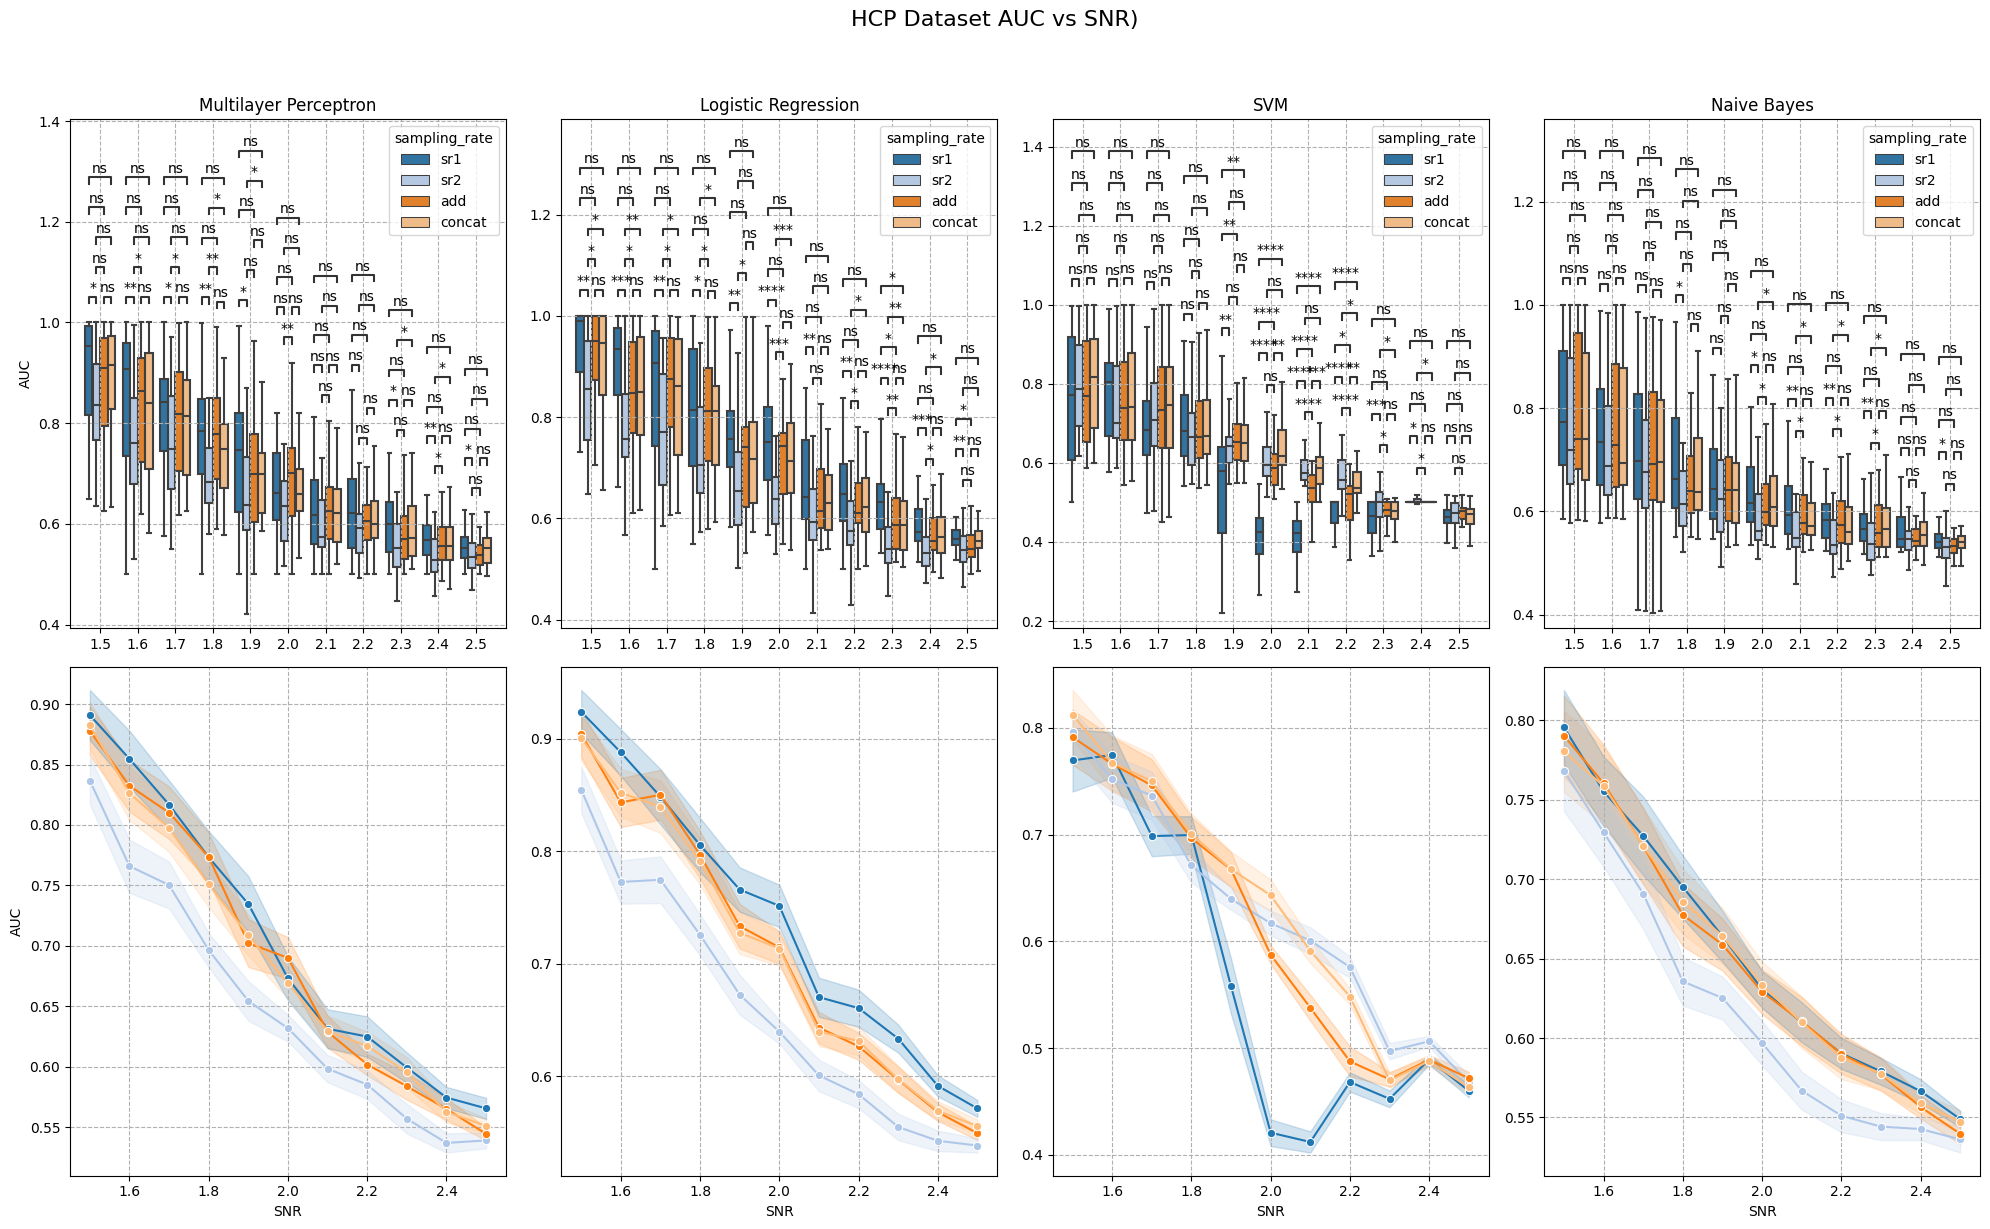

In [5]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from statannotations.Annotator import Annotator
import numpy as np
from scipy.stats import wilcoxon


# Define the directory for the current undersampling rate
pkl_dir = f'/data/users2/jwardell1/undersampling-project/HCP/pkl-files/us-6'

# Read and concatenate sr1 data
joined_files = os.path.join(pkl_dir, 'sr1_*.pkl')
joined_list = glob.glob(joined_files)
sr1 = pd.concat((pd.read_pickle(file).assign(sampling_rate='sr1') for file in joined_list), ignore_index=True)

# Read and concatenate sr2 data
joined_files = os.path.join(pkl_dir, 'sr2_*.pkl')
joined_list = glob.glob(joined_files)
sr2 = pd.concat((pd.read_pickle(file).assign(sampling_rate='sr2') for file in joined_list), ignore_index=True)

# Read and concatenate concat data
joined_files = os.path.join(pkl_dir, 'concat_*.pkl')
joined_list = glob.glob(joined_files)
concat = pd.concat((pd.read_pickle(file).assign(sampling_rate='concat') for file in joined_list), ignore_index=True)

# Read and concatenate add data
joined_files = os.path.join(pkl_dir, 'add_*.pkl')
joined_list = glob.glob(joined_files)
add = pd.concat((pd.read_pickle(file).assign(sampling_rate='add') for file in joined_list), ignore_index=True)

# Concatenate all dataframes
all_data = pd.concat([sr1, sr2, concat, add], ignore_index=True)

# Function to split each row into multiple rows based on cross-validation index
def split_row(row):
    new_rows = []
    for cv_ix, auc in enumerate(row['test_scores']):
        new_row = row.copy()
        new_row['auc'] = auc
        new_row['cv_ix'] = cv_ix
        new_rows.append(new_row)
    return pd.DataFrame(new_rows)

# Apply the split_row function to each row of the dataframe and concatenate the results
result_df = pd.concat(all_data.apply(split_row, axis=1).tolist(), ignore_index=True)

# Drop the original 'test_scores' column as it's no longer needed
result_df.drop('test_scores', axis=1, inplace=True)

grouped_classifiers = result_df.groupby('classifier')

classifier_dfs = {}
for classifier, group_df in grouped_classifiers:
    classifier_dfs[classifier] = group_df.copy()

mlp_df = classifier_dfs['Multilayer Perceptron']
lr_df = classifier_dfs['Logistic Regression']
svm_df = classifier_dfs['SVM']
nb_df = classifier_dfs['Naive Bayes']

dfs = [mlp_df, lr_df, svm_df, nb_df]
classifiers = ['Multilayer Perceptron', 'Logistic Regression', 'SVM', 'Naive Bayes']
sampling_rates = ['sr1', 'sr2', 'add', 'concat']
hue_order = sampling_rates
palette = {item: plt.cm.tab20(i) for i, item in enumerate(sampling_rates)}

# Combine all dataframes into one dataframe for plotting
combined_df = pd.concat(dfs)
snr_levels = [1.5 , 1.6 , 1.7 , 1.8 , 1.9 , 2.0, 2.1, 2.2, 2.3, 2.4, 2.5]

lower_limit = 1.5
combined_df = combined_df[combined_df['snr'] >= lower_limit]

# Define your variables
x = "snr"
y = "auc"
hue = "sampling_rate"
order = snr_levels

# Create the figure and the axes
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 12), gridspec_kw={'height_ratios': [1, 1]})

for i, classifier in enumerate(classifiers):
    # Filter the data for the current classifier
    data_filtered = combined_df[combined_df['classifier'] == classifier]
    
    # Boxplot
    sns.boxplot(
        x=x, y=y, hue=hue, data=data_filtered, ax=axes[0, i], palette=palette,
        order=order, hue_order=hue_order, showfliers=False
    )

    # Lineplot with error bands
    summary_df = data_filtered.groupby([x, hue]).agg(
        mean_auc=(y, 'mean'),
        std_auc=(y, 'std'),
        count=(y, 'count')
    ).reset_index()
    summary_df['se_auc'] = summary_df['std_auc'] / np.sqrt(summary_df['count'])
    
    sns.lineplot(
        data=summary_df, x=x, y='mean_auc', hue=hue, hue_order=hue_order,
        palette=palette, marker='o', ax=axes[1, i], legend=None
    )
    
    # Add error bands manually
    for key, grp in summary_df.groupby(hue):
        color = palette[key]
        axes[1, i].fill_between(grp[x], grp['mean_auc'] - grp['se_auc'], grp['mean_auc'] + grp['se_auc'], color=color, alpha=0.2)

    axes[0, i].set_title(f'{classifier}')
    axes[0, i].set_xlabel('')
    if i == 0:
        axes[0, i].set_ylabel('AUC')
        axes[1, i].set_ylabel('AUC')
    else:
        axes[0, i].set_ylabel('')
        axes[1, i].set_ylabel('')
    
    axes[1, i].set_xlabel('SNR')
    
    # Generate pairs for comparisons specific to the filtered data
    pairs = []
    for snr_level in order:
        for pair in combinations(hue_order, 2):
            if pair not in [{'sr1', 'sr2'}, {'add', 'concat'}]:  # Exclude specific pairs
                pairs.append(((snr_level, pair[0]), (snr_level, pair[1])))

    # Function to check if Wilcoxon test can be performed
    def can_perform_wilcoxon(group1, group2):
        try:
            stat, p = wilcoxon(group1, group2)
            return True
        except ValueError:
            return False

    valid_pairs = []
    for pair in pairs:
        snr_level = pair[0][0]
        group1 = data_filtered[(data_filtered[x] == snr_level) & (data_filtered[hue] == pair[0][1])][y]
        group2 = data_filtered[(data_filtered[x] == snr_level) & (data_filtered[hue] == pair[1][1])][y]
        if can_perform_wilcoxon(group1, group2):
            valid_pairs.append(pair)

    # Annotate the plot
    annotator = Annotator(axes[0, i], valid_pairs, data=data_filtered, x=x, y=y, hue=hue, order=order, hue_order=hue_order)
    annotator.configure(test='Mann-Whitney', verbose=2)
    annotator.apply_and_annotate()

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Add a super title
fig.suptitle(f"HCP Dataset AUC vs SNR)", fontsize=16, y=1.02)

# Add grid
for ax_row in axes:
    for ax in ax_row:
        ax.grid(True, which='both', axis='both', linestyle='--')

# Save the combined plot
plt.savefig(f'oulu_hue_layout_combined.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()
